# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.005393e+01     6.207418e+00
 * time: 0.005438804626464844
     1     2.853358e+01     4.473960e+00
 * time: 0.02497386932373047
     2     2.011068e+01     5.142264e+00
 * time: 0.04911398887634277
     3     1.436903e+01     4.203646e+00
 * time: 0.07445287704467773
     4     1.413682e+01     5.487567e+00
 * time: 0.09482479095458984
     5     1.405909e+01     4.016377e+00
 * time: 0.23421478271484375
     6     1.232310e+01     3.706770e+00
 * time: 0.2534618377685547
     7     1.108155e+01     2.902313e+00
 * time: 0.2723829746246338
     8     9.759174e+00     1.543775e+00
 * time: 0.2913219928741455
     9     8.941081e+00     9.714060e-01
 * time: 0.3103048801422119
    10     8.602010e+00     5.737446e-01
 * time: 0.32922983169555664
    11     8.597899e+00     1.295709e+00
 * time: 0.3434028625488281
    12     8.511308e+00     1.067385e+00
 * time: 0.3622868061065674
    13     8.424032e+00     5.820698e-01
 * time: 0.37

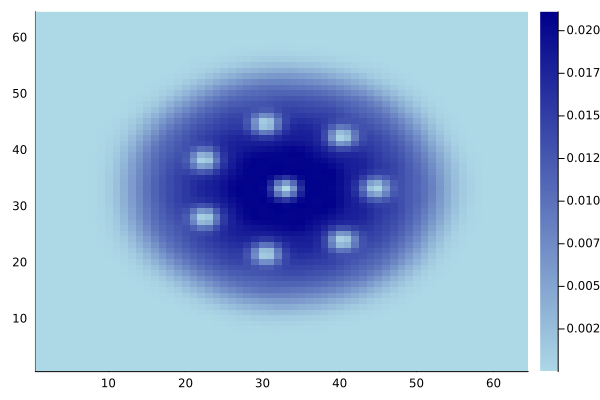

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)